In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [124]:
dataname = 'bank'
datafile = 'bank-full'
filepath = f'bank+marketing/{dataname}/{datafile}.csv'

In [125]:
df = pd.read_csv(filepath, sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [127]:
# merge month and day into one column
# month_days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
# accumulated_days = [sum(month_days[:i]) for i in range(len(month_days))]
# print(accumulated_days)
# month2number = {
#     'jan': 1,
#     'feb': 2,
#     'mar': 3,
#     'apr': 4,
#     'may': 5,
#     'jun': 6,
#     'jul': 7,
#     'aug': 8,
#     'sep': 9,
#     'oct': 10,
#     'nov': 11,
#     'dec': 12,
# }
# df['year_day'] = df.apply(lambda row: accumulated_days[month2number[row['month']] - 1] + row['day'], axis=1)
# df['year_day'].describe()

In [128]:
discrete_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
continuous_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df = df[continuous_features + discrete_features]

In [129]:
with open('bank.info', 'w') as f:
    for feature in continuous_features:
        f.write(f'{feature} continuous\n')
    for feature in discrete_features:
        f.write(f'{feature} discrete\n')
    f.write('LABEL_POS -1')
# df[col] = df[col].apply(lambda x: i if x == cate else x)


In [130]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [131]:
# 数据截断
longtail_cols = ['balance', 'duration', 'campaign', 'pdays', 'previous']
for col in longtail_cols:
    x_999 = df[col].quantile(0.999)
    print(col, x_999, df[col].max())
    df[col] = df[col].apply(lambda x: x_999 if x > x_999 else x)
df.describe()


balance 32892.77000000214 102127
duration 2091.740000000049 4918
campaign 32.0 63
pdays 650.3700000000244 871
previous 22.0 275


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1345.504798,15.806419,257.533013,2.757404,40.091483,0.567052
std,10.618762,2767.633852,8.322476,251.581190,3.020695,99.402919,1.786760
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,32892.770000,31.000000,2091.740000,32.000000,650.370000,22.000000


In [132]:
df.to_csv('bank.data', index=False, header=False, sep=',')

In [133]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100
missing_values.sum()

0.0

In [134]:
# y label
for (i, x) in df['y'].value_counts().items():
    print(i, x, x/df.shape[0])

no 39922 0.8830151954170445
yes 5289 0.11698480458295547


# Data Analysis

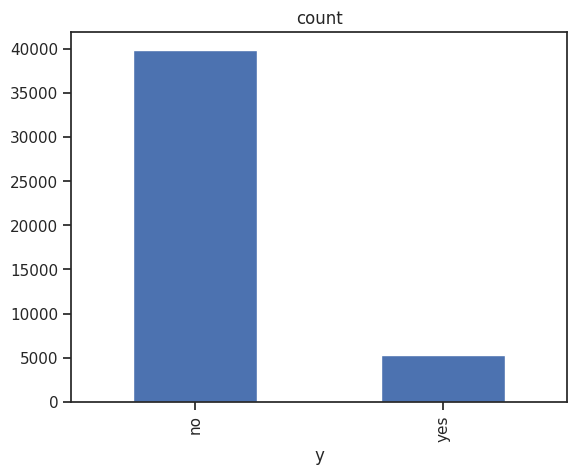

In [135]:
# y 特征
value_counts = df['y'].value_counts()
value_counts.plot.bar(title='count')
plt.savefig('figs/'+dataname+'_y_distribution.png', dpi=300, bbox_inches='tight')

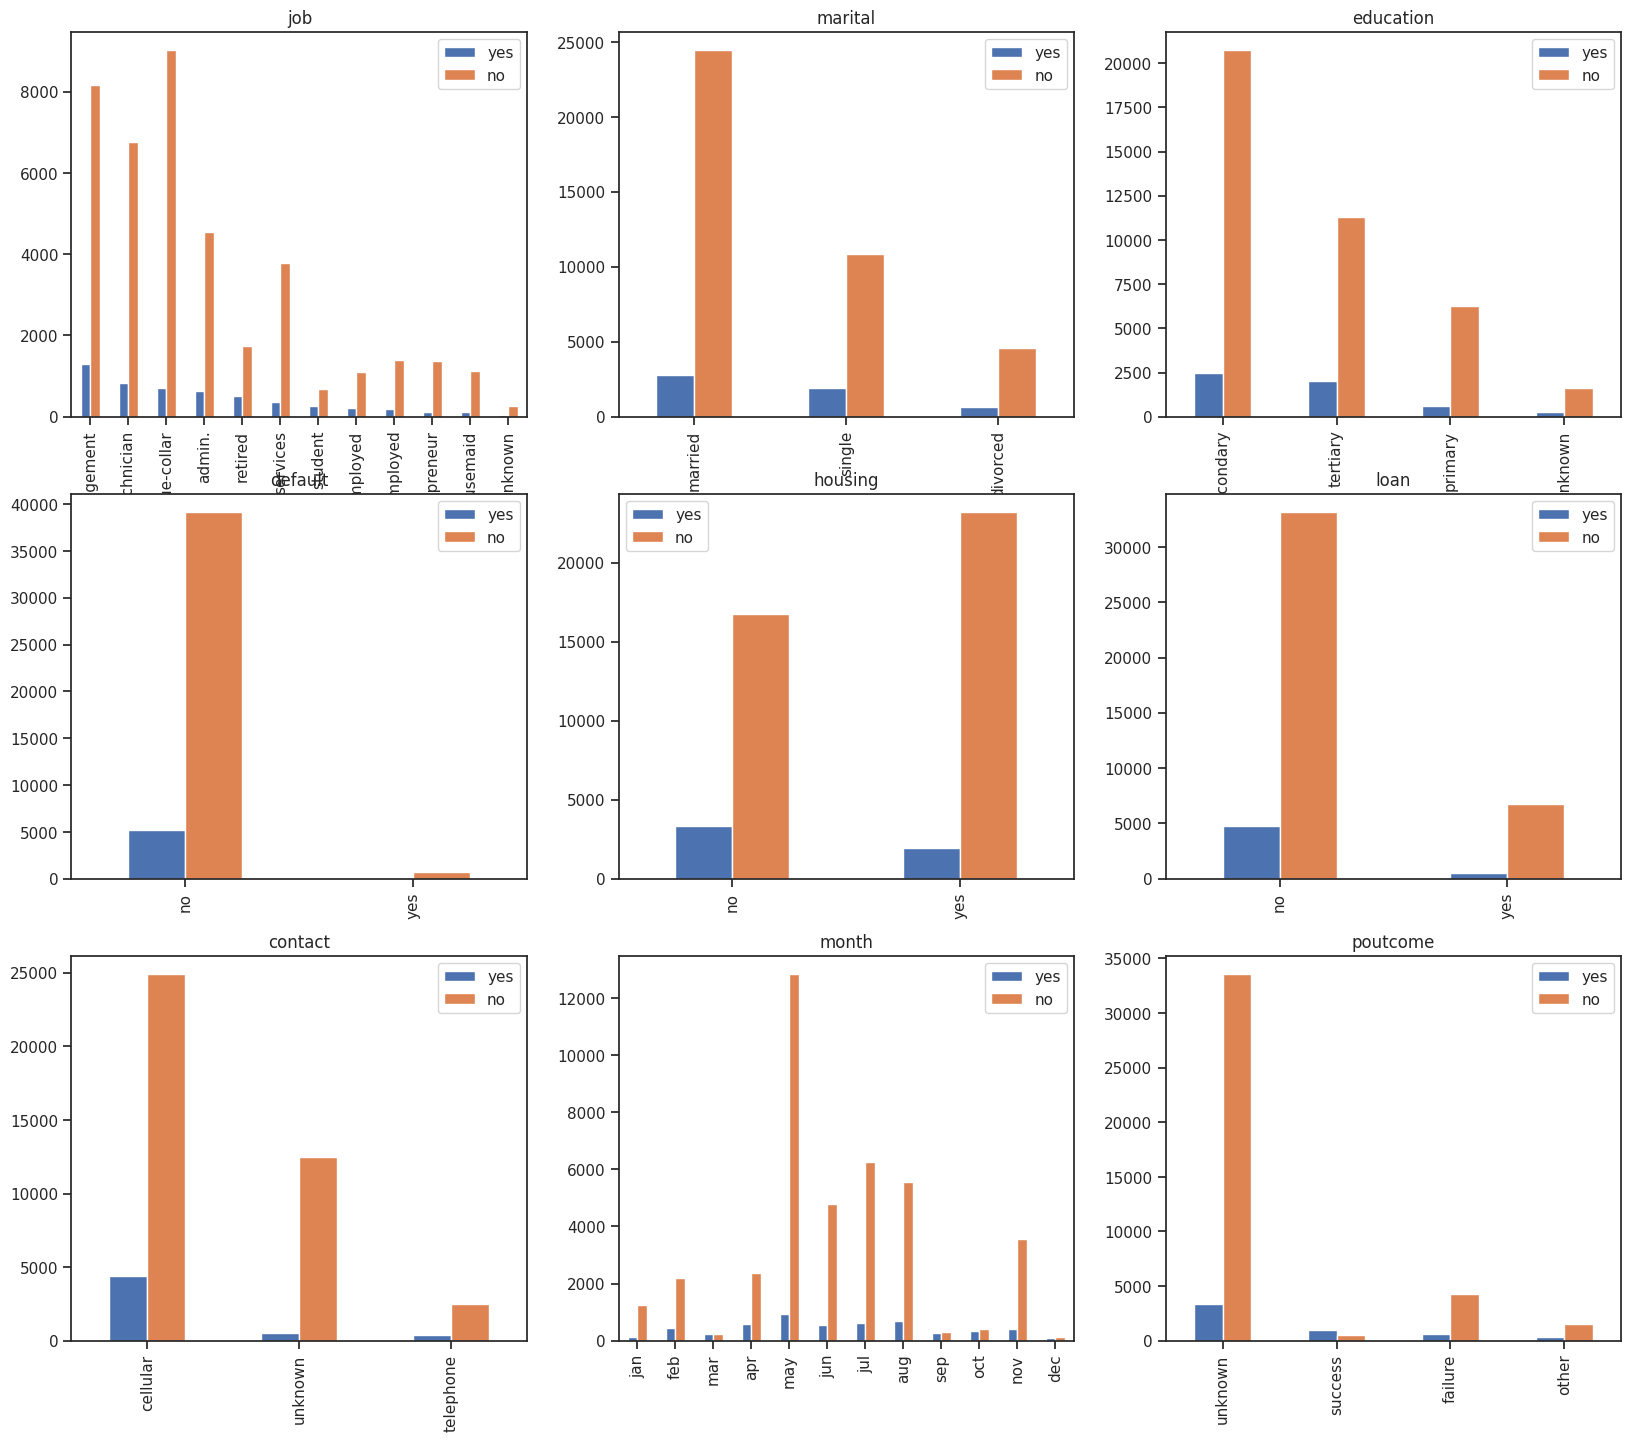

In [136]:
# 离散特征

cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 17))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    # axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    j_df = pd.DataFrame()
    # j_df['total'] = df[cat_column].value_counts()
    if cat_column == 'month':
        j_df['yes'] = df[df['y'] == 'yes'][cat_column].value_counts(sort=False)
        j_df['no'] = df[df['y'] == 'no'][cat_column].value_counts(sort=False)
        j_df = j_df.reindex(index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct','nov', 'dec'])
    j_df['yes'] = df[df['y'] == 'yes'][cat_column].value_counts()
    j_df['no'] = df[df['y'] == 'no'][cat_column].value_counts()
    
    
    j_df.plot(kind='bar', ax=axs[trace_x, trace_y], title = cat_column)
    # y = axs[trace_x, trace_y].height
    # axs[trace_x, trace_y].annotate("{:.2f}".format(y), xytext=(0.5, 0.5), xycoords='axes fraction', fontsize=20)
    axs[trace_x, trace_y].set_xlabel(None)
    # print(j_df)

    # axs[trace_x, trace_y].bar(x=x_pos, height=df[df['y'] == 'yes'][cat_column].value_counts(),label='yes')
    # axs[trace_x, trace_y].bar(x=x_pos, height=df[df['y'] == 'no'][cat_column].value_counts(),label='no')
    # plt.legend()
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1
plt.savefig('figs/'+dataname+'_discrete_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

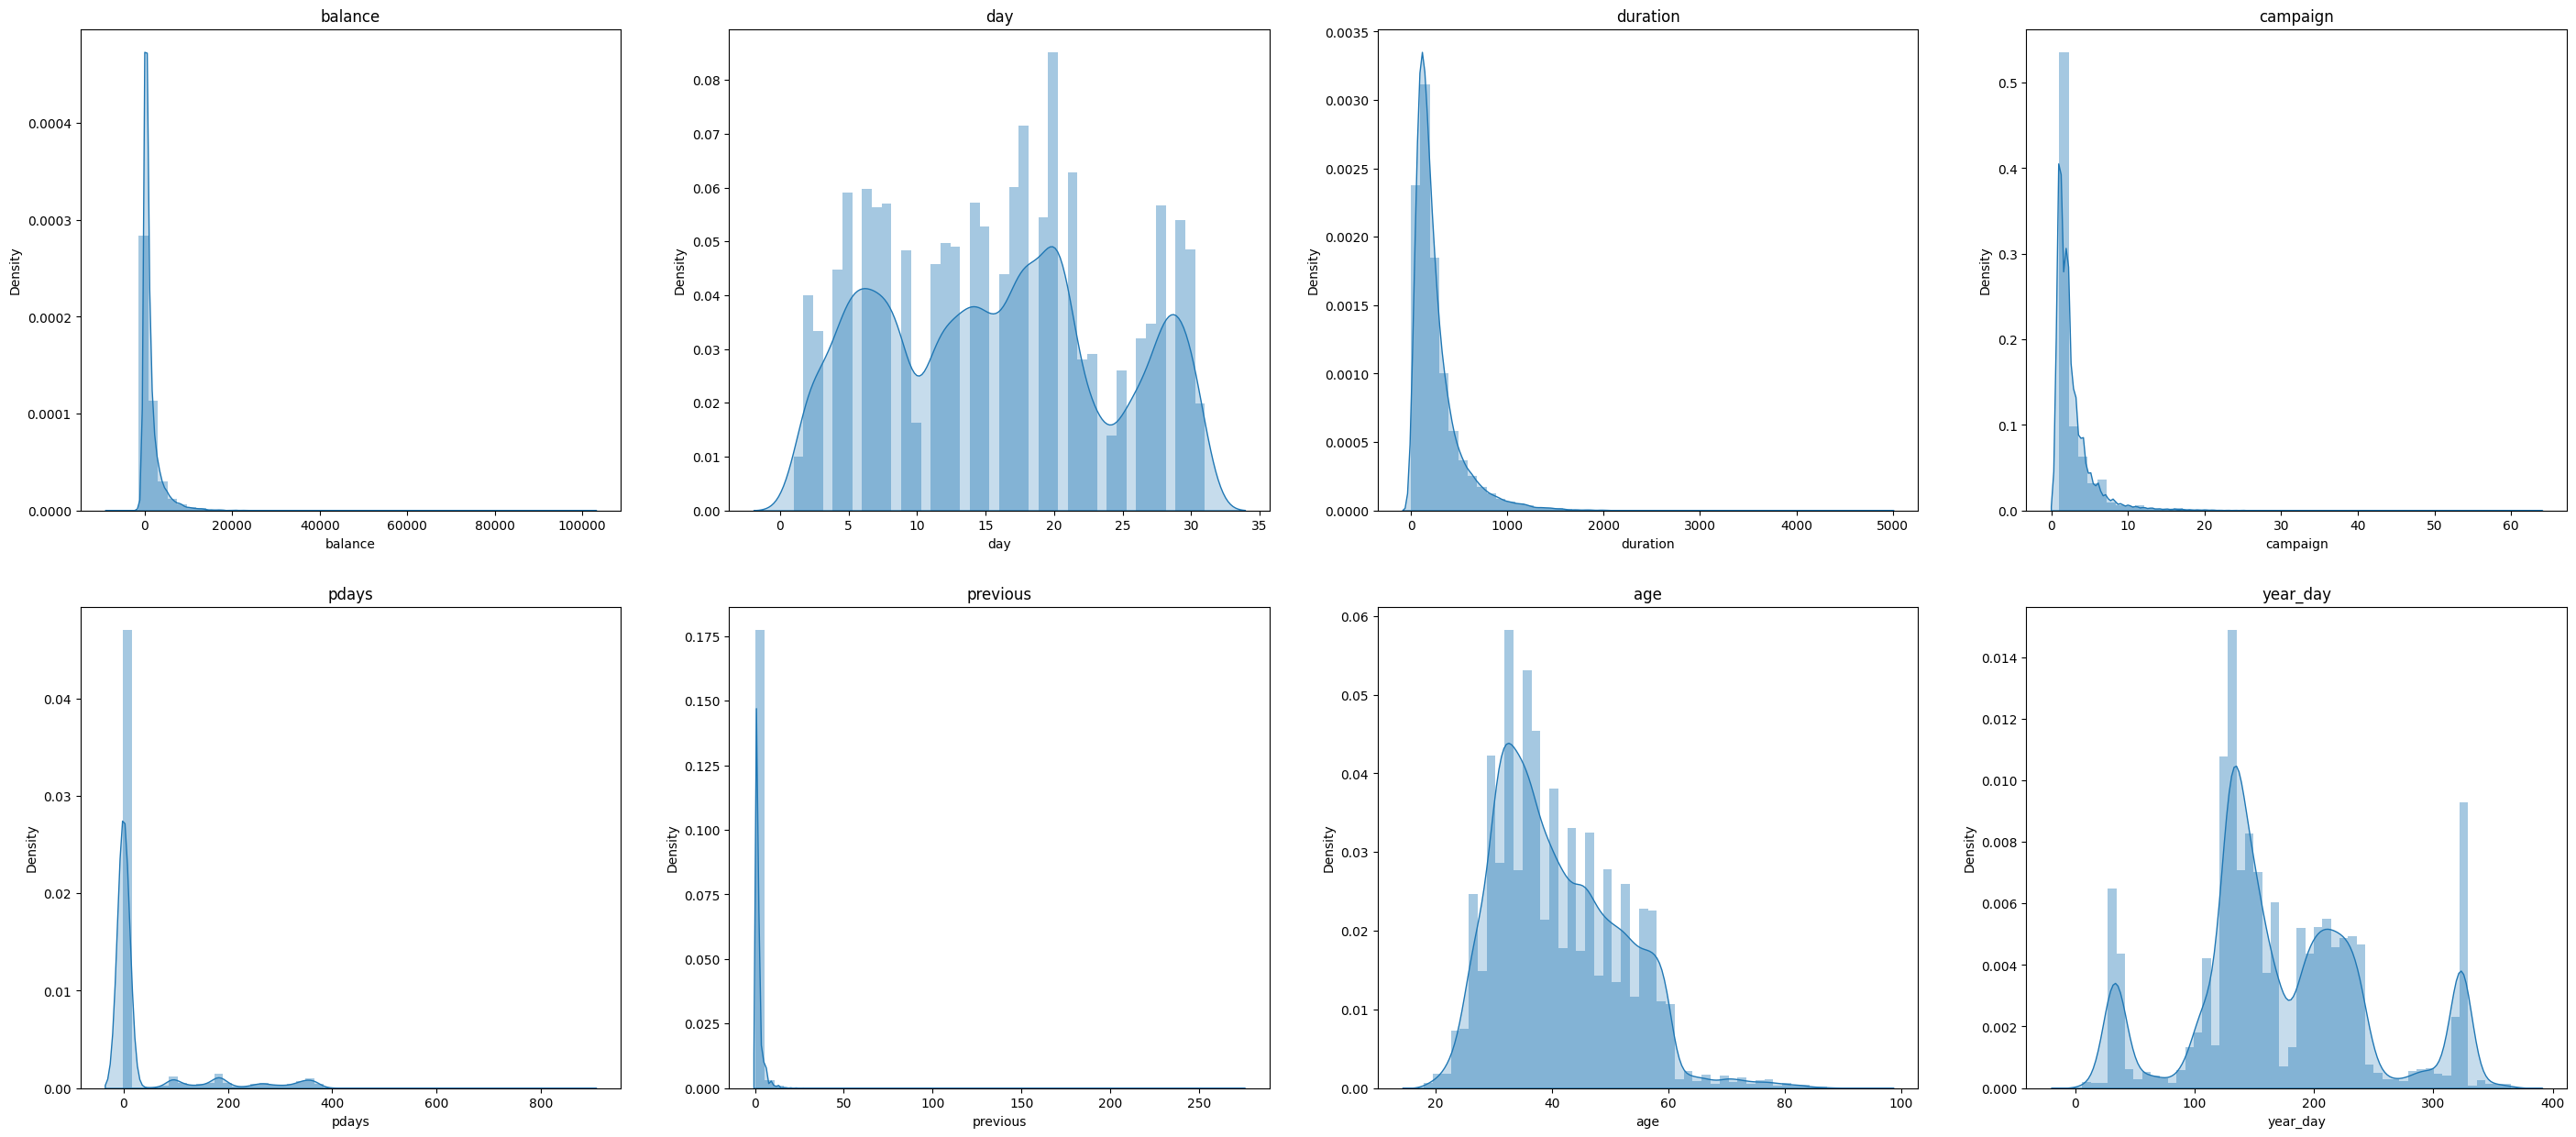

In [100]:
# 连续特征

num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous', 'age', 'year_day']

fig, axs = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(35, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 4
    trace_y = counter % 4
    
    # axs[trace_x, trace_y].hist(df[num_column])
    sns.distplot(df[num_column], ax=axs[trace_x, trace_y], hist=True, kde_kws={"shade": True})
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1
plt.savefig('figs/'+dataname+'_continuous_distribution_1.png', dpi=300, bbox_inches='tight')
plt.show()

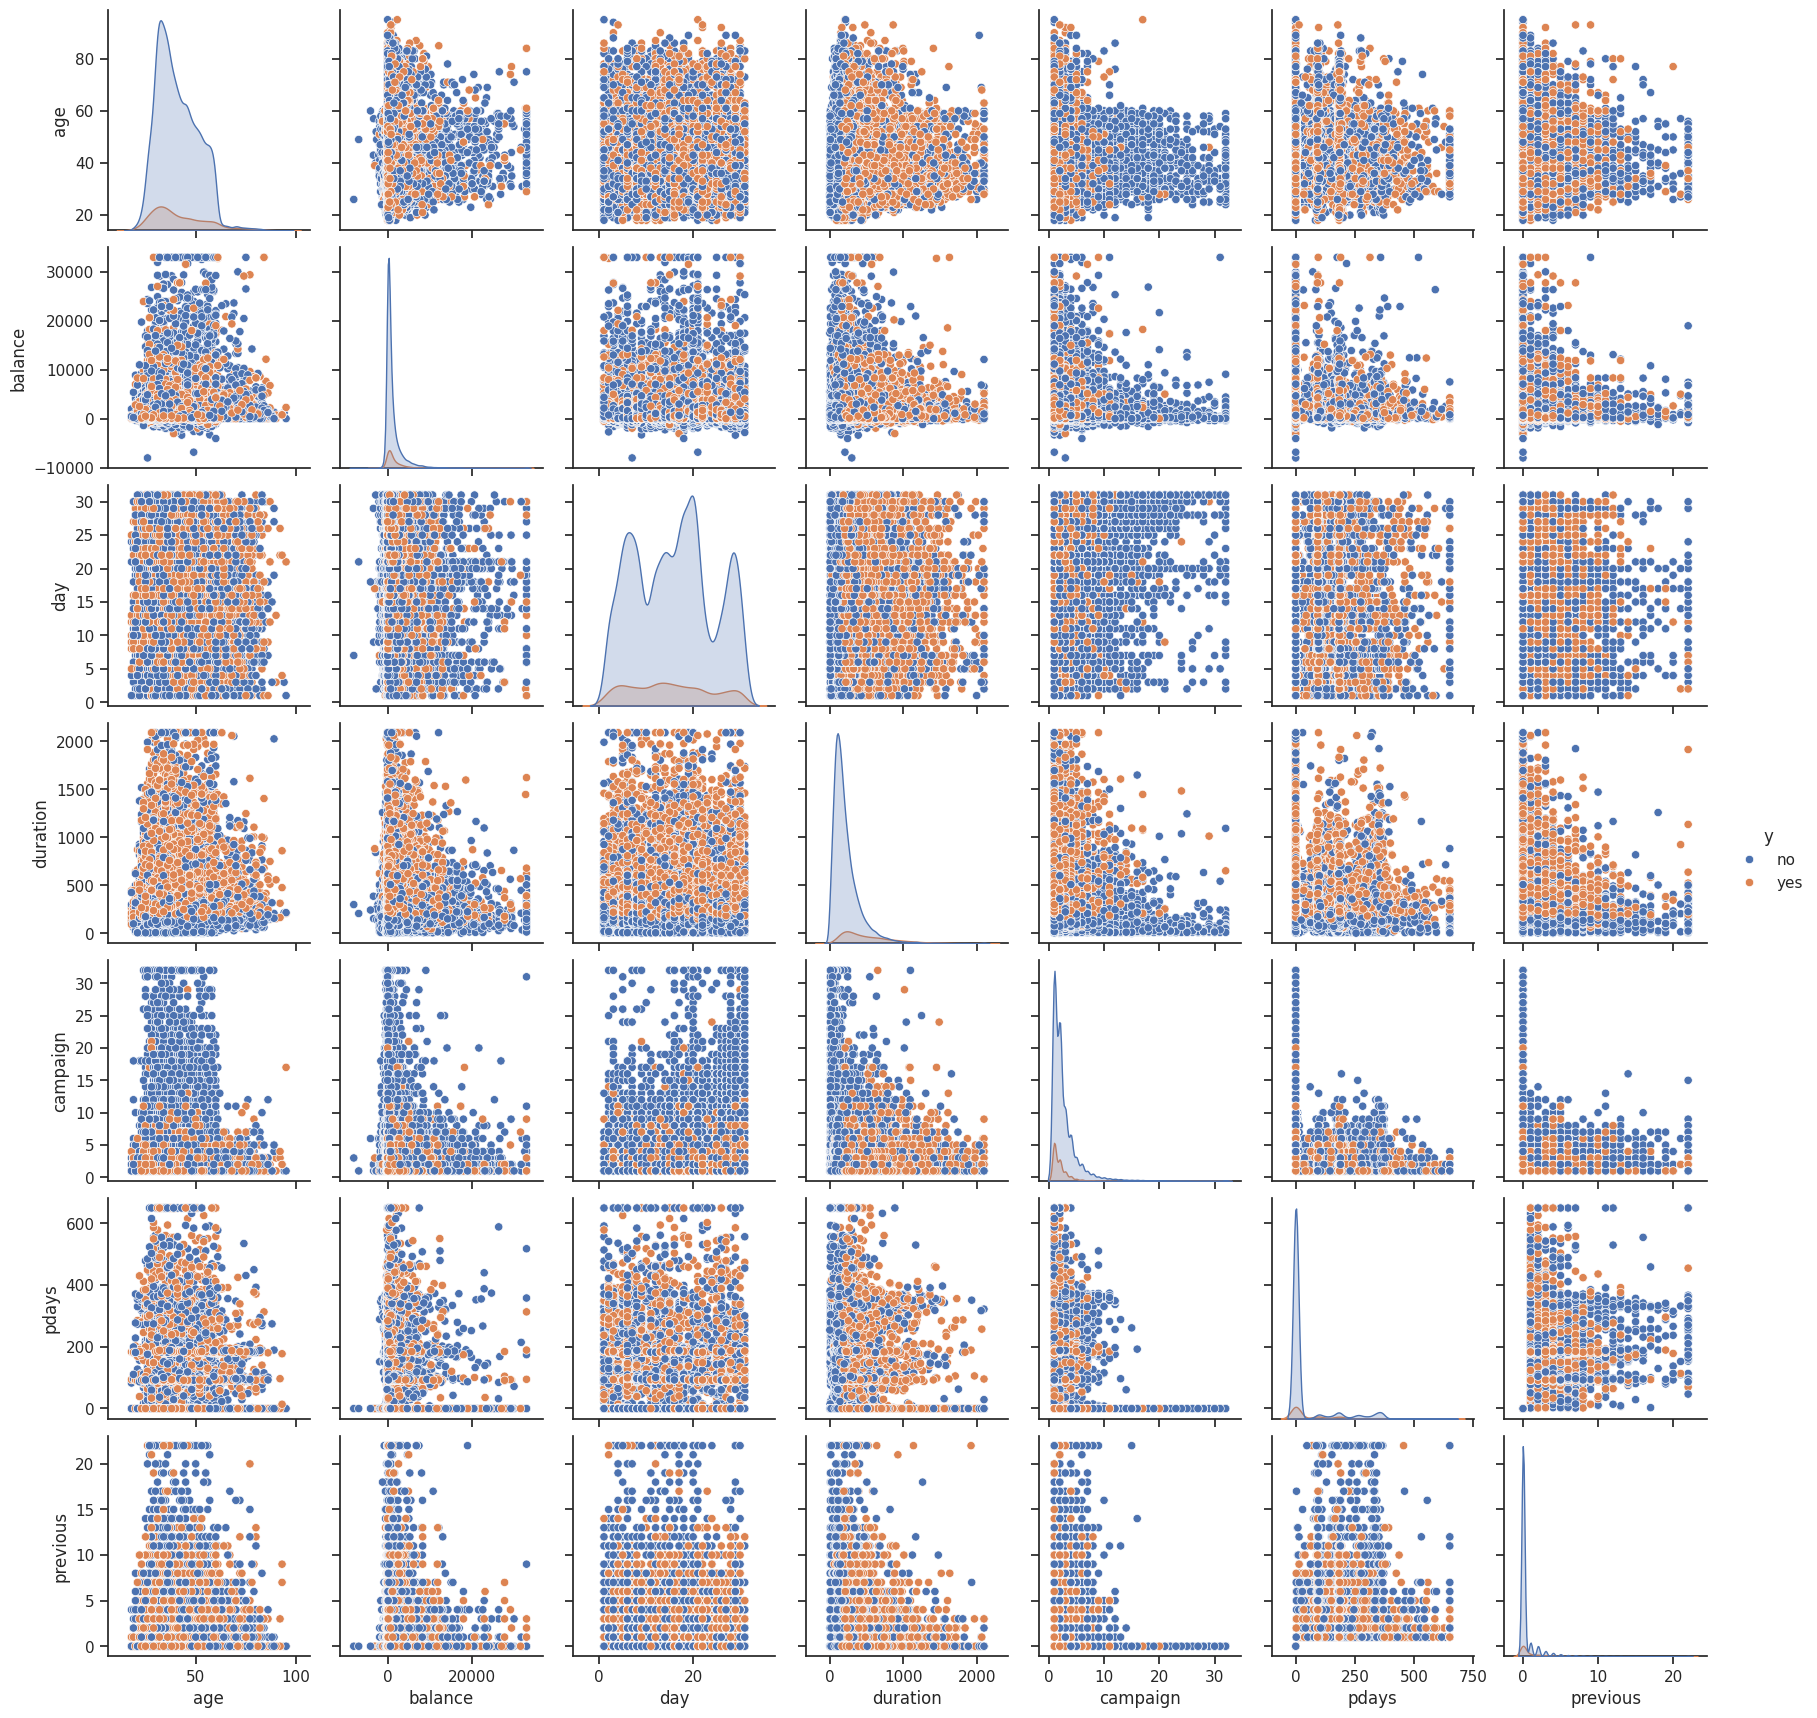

In [138]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue="y")
# sns.pairplot(df, kind='reg')
plt.savefig('figs/'+dataname+'_pairlot.png', dpi=300, bbox_inches='tight')
plt.show()